# Librerias

In [1]:
from __future__ import absolute_import, division, print_function #libreria de compatibilidad de Python
import numpy as np 
import pandas as pd 


import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import tensorflow as tf
from tensorflow.keras import layers

import cv2 #formato cv2 de OpenCv
import matplotlib.pyplot as plt 
import seaborn as sns


from PIL import Image#como son imagenes TIFF, esta libreria ayuda mucho
import os #permite usar algunas caracteristicas del Sistema operativo en turno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print(os.listdir("C:\\Users\Z840Lab01\Downloads\dsojos"))#listar todo lo que haya en esa direccion

Using TensorFlow backend.


['abnormal', 'normal']


# Carga y preprocesamiento de imagenes

# Procesamiento con  Messidor y APTOS juntos
   ### Normal 
   son 2355 fotos
   ### Abnormal
   son 2510 fotos
    
    
## Concatenacion de datasets

1200 MESSIDOR

3665 APTOS

#### Los dataset fueron concatenados a mano en 2 carpetas (abnormal y normal) 

In [2]:
abnormal = os.listdir('C:\\Users\Z840Lab01\Downloads\dsojos\\abnormal') 
normal = os.listdir('C:\\Users\Z840Lab01\Downloads\dsojos\\normal')

##### Convertimos en arrays ambas variables de entrada
Ejecutamos para estar seguro que fueron transformados correctamente

In [3]:
abnormalarray = np.array(abnormal)
print('El tamaño de abnormal es: ',abnormalarray.shape)

El tamaño de abnormal es:  (2510,)


In [4]:
normalarray = np.array(normal)
print('El tamaño de normal es: ',normalarray.shape)

El tamaño de normal es:  (2355,)


#### Asignacion de etiquetas, reescalado y creacion de listas nuevas con las imagenes modificadas
NOTA: Esto lleva considerable cantidad de tiempo, en la maquina actual con 16GB en RAM son aprox. 15 min

In [5]:
#ya desde aqui se empeza a trabar mi lap
imagenes = []
diagnostico = [] #Se crea la lista de etiquetas para clasificar las imagenes

###########################################################
# Asignacion de una etiqueta para las imagenes en Abnormal# 
###########################################################

for i in abnormalarray: #contador en abnormal
    try:
        image = cv2.imread('C:\\Users\Z840Lab01\Downloads\dsojos\\abnormal/' + i)
        
        #############################################
        #volvemos a convertir en imagenes el arreglo#
        #############################################

    #Intento 1: las imagenes se metieron con tamaño original, unable to locate 21GB on a array
    #Intento 2: reescalamos su tamaño de 2240x1488 a 1920x1080, ultra pesados hay mejores    
    #Intento 3: reescalar a la mitad las imagenes  de 2240x1488 a 1120x744, 16GB de RAM no fueron suficientes (chale)
    #Intento 5: reescalar hasta un tamaño de 100x100(ya me canse),
    #Intento 4: reescalar hasta un tamaño de 50x50(estoy harto),
    
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100, 100))                           #142 x 148 -> 50x50
    
    
    #Agrega a la lista "imagenes" la nueva imagen procesada
        imagenes.append(np.array(resize_img))
    #Agrega a la lista de "diagnostico", la etiqueta "1" que signiica que esta infectada
        diagnostico.append(1)

    except AttributeError:
        print('algo fallo en abnormal')
        
################################################################    
#Ocurrira lo mismo que el codigo anterior, pero ahora en normal#
################################################################

for u in normalarray: #contador en normal
    try:        
        image1 = cv2.imread('C:\\Users\Z840Lab01\Downloads\dsojos\\normal/' + u)
        image_array1 = Image.fromarray(image1 , 'RGB')
        resize_img1 = image_array1.resize((100, 100))
        
     #Agrega a la lista ima la nueva imagen procesada
        imagenes.append(np.array(resize_img1))
    #Agrega a la lista de diagnostico, la etiqueta "0" que signiica que esta sana
        diagnostico.append(0)
        
    except AttributeError:
        print('algo fallo en normal')


In [6]:
#Comprobacion que todo salio bien
print("El numero total de imagenes es de 4865")
print("Se supone que tiene que dar el mismo numero: ", len(imagenes))


El numero total de imagenes es de 4865
Se supone que tiene que dar el mismo numero:  4865


Ya concatenadas las listas, procedemos a guardarlas como arrays

In [7]:
################################################################
##NOTA DE TIEMPO: en mi lap, fueron mas de 20 min en ejecucion##
##Principalmente por el size de las imagenes
################################################################
#en la variable "im" guardamos el arreglo con todos los elementos de la lista concatenada "imagenes"
im = np.array(imagenes)
#en la variable "labels" guardamos el arreglo con todos los elementos de la lista "diagnostico"
diag = np.array(diagnostico)

#Guardamos los nuevos arreglos generados.
np.save('Imagenes' , im)
np.save('Etiquetas' , diag)

#originales 11.5 GB
#en HD fueron 6.95 GB 
#mitad si funciono


In [8]:
print('El Dataset completo contiene: ')
print('Imagenes de Ojo: {} | Etiquetas: {}'.format(im.shape, diag.shape))

#en ambas listas el primer numero debe ser 4865

El Dataset completo contiene: 
Imagenes de Ojo: (4865, 100, 100, 3) | Etiquetas: (4865,)


## Visualizacion de datos

Para comprobar

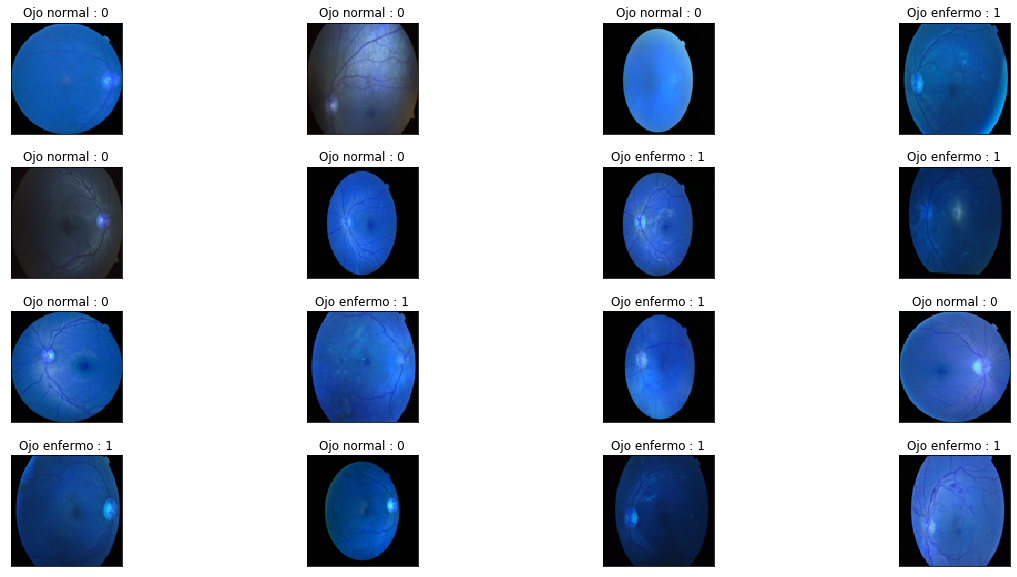

In [9]:
#comprobacion del etiquetado

# Se imprimira una tabla para visualizar los datos
plt.figure(1 , figsize = (20 , 10))
n = 0 #contador de imagenes
for i in range(16):
    n += 1

#regresa integers random de los inputs, con valor minimo 0 y valor maximo 1, forma 0 por defecto
    r = np.random.randint(0 , im.shape[0] , 1)
    
#la tabla se imprimira en un tamaño 7x7 con la cantidad que se le de a N
    plt.subplot(4 , 4 , n)
#el espacio entre cada imagen sera de 0.5 
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
#imprimira una imagen aleatoria del conjunto de celulas
    plt.imshow(im[r[0]])
#imprimira el formato de texto de la tabla dependiendo del valor de la etiqueta
    plt.title('{} : {}'.format('Ojo enfermo' if diag[r[0]] == 1 else 'Ojo normal' , diag[r[0]]) )
#imprimira los valores en el ejex y ejey, pero en este caso no los llenaremos, solo sera para darle forma a la tabla
    plt.xticks([]) , plt.yticks([])
#imprimiremos todo lo anterior    
plt.show()

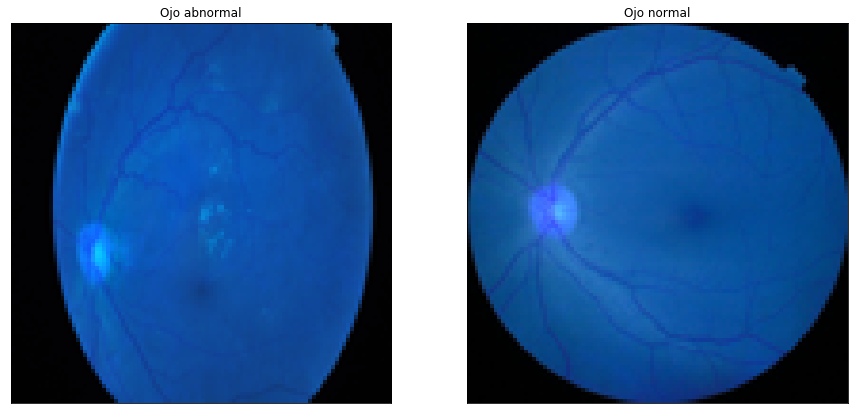

In [29]:
#comprobacion de imagenes, tomando en cuenta el orden en que fueron cargadas:

plt.figure(1, figsize = (15 , 10))
plt.subplot(1 , 2 , 1)
plt.imshow(im[4])
plt.title('Ojo abnormal')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(im[4000])
plt.title('Ojo normal')
plt.xticks([]) , plt.yticks([])

plt.show()

### Preparacion del dataset modificado para su ingreso a la CNN 

In [10]:
#todo el dataset sera ordenado de manera aleatoria
n = np.arange(im.shape[0])
np.random.shuffle(n)#con esto
im = im[n]
diag = diag[n]


In [11]:
#conversion de tipo de dato, esto puede tiempo considerable, depende de la maquina y su poder:
#nparray a float32, por la cantidad de datos que pueden ser NO exactos que se generaran
#en diag sera mas sencillo ya que solo se pasaran a enteros
im = im.astype(np.float32)
diag = diag.astype(np.int32)

#no recuerdo porque iba, pero si lo eliminas marca error de dimensiones
im = im/255

In [12]:
im.shape


(4865, 100, 100, 3)

In [13]:
diag.shape

(4865,)

## Subsets
random state:
sin este valor cada ves que se ejecute el programa tendra diferentes datos de entrenamiento
ya que se generara un valor aleatorio, sacando diferentes valores cada vez

If int, random_state is the seed used by the random number generator

Se armaran 3 subsets principales, el de entrenamiento que a partir de la seleccion aleatoria se apartara un 20% para el test
y el de prueba y evaluacion que tendran la misma cantidad de imagenes, y que NUNCA se mostraran durante el entrenamiento 

In [14]:
from sklearn.model_selection import train_test_split#Split arrays or matrices into random train and test subsets

train_x , x , train_y , y = train_test_split(im , diag , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.4 , 
                                                    random_state = 111)


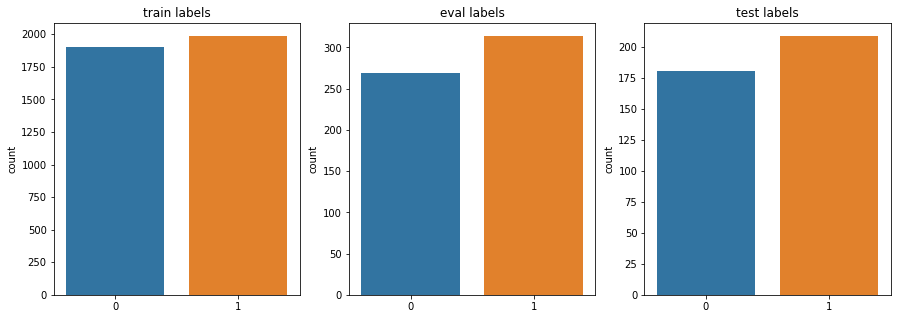

In [15]:
#imprimira las graficas con la cantidad de datos que tenemos en cada subset
#el azul representa la cantidad de datos para testear cada subset y la naranja es la cantidad total de datos
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y ,eval_y , test_y ] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x=z)
    plt.title(j)
plt.show()


In [16]:
#mostrara el shape de los 3 subsets
print('El entrenamiento es de:{} '.format(train_x.shape))
print('La evaluacion es de:{}'.format(eval_x.shape))
print('Las pruebas son de: {}'.format(test_x.shape))                                                          
                                                                             
#los valores mostrados son iguales tanto en X como en Y
#recordar que el numero total de imagenes es de 4865

El entrenamiento es de:(3892, 100, 100, 3) 
La evaluacion es de:(583, 100, 100, 3)
Las pruebas son de: (390, 100, 100, 3)


## Modelo de Red neuronal con Tensorflow y keras

In [34]:

def cnn_model_fn(features , labels , mode):
    #se asigna un contenedor de imagenes, -1 aplana y paquetes de 50 renglons y 50 columnas
    input_layers = tf.reshape(features['x'] , [-1 , 100 , 100 ,3])   

#Todas las capas a excepcion de la ultima ocuparan la funcion RELU
#seran 3 capas convolucionales juntas para una ma al final una pooling obtendra esos resultados y los achicara aun mas
#Sera

    conv1 = tf.layers.conv2d(#porque el arreglo es input 4D
            inputs = input_layers , 
            filters = 90 ,#50 
            kernel_size = [7 , 7],
            padding = 'same',
            strides=(2),
            activation = tf.nn.relu
            ) 
        
    conv2 = tf.layers.conv2d(
            inputs = conv1, 
            filters = 50,#90
            kernel_size = [3 , 3],
            padding = 'valid',
            strides=(2),
            activation = tf.nn.relu
            )
        
    conv3 = tf.layers.conv2d(
            inputs = conv2 ,
            filters = 10,
            kernel_size = [5 , 5],
            padding = 'same', 
            strides=(1),
            activation = tf.nn.relu
            )
    
    pool1 = tf.layers.max_pooling2d(inputs = conv3 , pool_size = [2 , 2] ,
                                    strides = 2 )
    conv4 = tf.layers.conv2d(
            inputs = pool1 ,
            filters = 5,
            kernel_size = [3 , 3],
            padding = 'same', 
            strides=(1),
            activation = tf.nn.relu
            )

    pool2 = tf.layers.max_pooling2d(inputs = conv4 , pool_size = [2 , 2] ,
                                    strides = 2 , padding = 'same')
    
#Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a
#fully connected neural network classifier.    
    pool2_flatten = tf.layers.flatten(pool2)
    
    fc1 = tf.layers.dense(
        inputs = pool2_flatten,
        units = 1000,
        activation = tf.nn.relu
        )
    fc2 = tf.layers.dense(
        inputs = fc1,
        units = 512,
        activation = tf.nn.relu
        )
    fc3 = tf.layers.dense(
        inputs = fc2 , 
        units = 256 ,
        activation = tf.nn.relu
        )
    
#A fully connected layer also known as the dense layer, 
#in which the results of the convolutional layers are fed through one or more neural layers to generate a prediction.
    logits = tf.layers.dense(
        inputs = fc3 ,
        units = 2
        )
    
    predictions = {
        'clases': tf.argmax(input = logits , axis = 1),
        'probabildades': tf.nn.softmax(logits , name = 'tensor_softmax')
    }
    
#prediccion   
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , 
                                                 logits = logits)
    
#entrenamiento
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_op 
                                           )
#metricas
    eval_metric_op = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['clases'])}
#estimador
    return tf.estimator.EstimatorSpec(mode = mode , 
                                     loss = loss , 
                                     eval_metric_ops = eval_metric_op)    



In [35]:
#todos los procesos que hara la red neuronal se iran guardando en un archivo temporal
DR_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                         model_dir = 'C:\\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Z840Lab01\\Documents\\Jupyter Notebook\\CNNentrenada', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
#La maquina  con 16GB de RAM tiene tensorflow 2.1.0, por lo que con el cambio de version algunas caracteristicas se perdieron
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.1.0


In [36]:
#Prints the given tensors every N local steps, every N seconds, or at end.
tensors_to_log = {'probabidades':'tensor_softmax'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 50 #50
    )

## Entrenamiento de la CNN
### Preparence para los problemas

In [41]:
#Regresa una funcion input que puede alimentar a algun diccionario de numpy arrays en el modelo
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},#numpy array object 
    y = train_y,#numpy array object 
    batch_size = 100 ,#size of batches to return. 
    num_epochs = None, #number of epochs to iterate over data. If None will run forever.
    shuffle = True #If True shuffles the queue. Avoid shuffle at prediction time.
    )
DR_detector.train(input_fn = train_input_fn , steps = 1, hooks = [logging_hook])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt.
INFO:tensorflow:probabidades = [[0.5002201  0.49977988]
 [0.50038683 0.49961314]
 [0.5006342  0.4993658 ]
 [0.50078356 0.49921653]
 [0.5003024  0.4996976 ]
 [0.50216436 0.49783567]
 [0.49904472 0.5009553 ]
 [0.50189286 0.4981071 ]
 [0.4993762  0.5006238 ]
 [0.49772346 0.5022766 ]
 [0.5013552  0.4986448 ]
 [0.5014128  0.49858716]
 [0.50089985 0.49910012]
 [0.5013531  0.49864694]
 [0.49847367 0.50152636]
 [0.49992055 0.50007945]
 [0.50153655 0.4984634 ]
 [0.499713   0.500287  ]
 [0.49855363 0.50144637]
 [0.4976061  0.50239384]
 [0.50077003 0.49922997]
 [0.5005135  0.4994865 ]
 [0.5012362  0.49876374]
 [0.49919346 0.50080657]
 [0.4998667  0.

In [43]:
#Entrenamiento de la red, usando las imagenes
DR_detector.train(input_fn = train_input_fn, steps = 10000)#10000

#Una buena señas es que l "Loss" debe ir disminuyendo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt.
INFO:tensorflow:loss = 0.692065, step = 2
INFO:tensorflow:global_step/sec: 2.06368
INFO:tensorflow:loss = 0.69098765, step = 102 (48.457 sec)
INFO:tensorflow:global_step/sec: 2.08003
INFO:tensorflow:loss = 0.69078153, step = 202 (48.076 sec)
INFO:tensorflow:global_step/sec: 2.07281
INFO:tensorflow:loss = 0.6904847, step = 302 (48.266 sec)
INFO:tensorflow:global_step/sec: 2.07544
INFO:tensorflow:loss = 0.6875575, step = 402 (48.160 sec)
INFO:tensorflow:global_step/sec: 2.08019
INFO:tensorflow:loss = 0.68793494, step = 502 (48.0

INFO:tensorflow:loss = 0.2966679, step = 6802 (48.303 sec)
INFO:tensorflow:global_step/sec: 2.07666
INFO:tensorflow:loss = 0.52179384, step = 6902 (48.192 sec)
INFO:tensorflow:Saving checkpoints for 7001 into C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt.
INFO:tensorflow:Loss for final step: 0.34559533.


In [45]:
#comparacion con los datos de evaluacion
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = DR_detector.evaluate(input_fn = eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-19T12:05:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt-7001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.00263s
INFO:tensorflow:Finished evaluation at 2020-03-19-12:05:27
INFO:tensorflow:Saving dict for global step 7001: accuracy = 0.84562606, global_step = 7001, loss = 0.34003097
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7001: C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt-7001
{'accuracy': 0.84562606, 'loss': 0.34003097, 'global_step': 7001}


In [48]:
#predicciones
pred_input_fn = tf.estimator.inputs.numpy_input_fn(
                                                    x = {'x' : test_x},
                                                    y = test_y,
                                                    num_epochs = 1,
                                                    shuffle = False
                                                    )


#estas 2 variables contienen todos los resultados
y_pred = DR_detector.predict(input_fn = pred_input_fn)
classes = [p['clases'] for p in y_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Z840Lab01\Documents\Jupyter Notebook\CNNentrenada\model.ckpt-7001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Metricas de Evaluacion

In [50]:
#matriz de confusion con parametros
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

print('{} \n{} \n{}'.format(confusion_matrix(test_y , classes) , 
                           classification_report(test_y , classes) , 
                           accuracy_score(test_y , classes)))

[[119  62]
 [ 14 195]] 
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       181
           1       0.76      0.93      0.84       209

    accuracy                           0.81       390
   macro avg       0.83      0.80      0.80       390
weighted avg       0.82      0.81      0.80       390
 
0.8051282051282052


The accuracy del modelo = TP+TN/(TP+TN+FP+FN) =  0.8051282051282052 
 The Missclassification = 1-Accuracy =  0.19487179487179485 
 Sensitivity True Positive Rate = TP/(TP+FN) =  0.9330143540669856 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.6574585635359116 
 Positive Predictive value = TP/(TP+FP) =  0.7587548638132295 
 Negative predictive Value = TN/(TN+FN) =  0.8947368421052632 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2.7237999691310386 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.10188573036870253


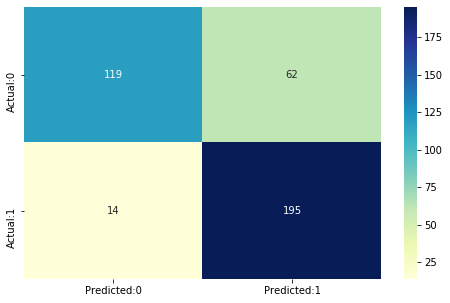

In [56]:
#matriz de confusion
cm=confusion_matrix(test_y , classes)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TN=cm[0,0]#true negative
TP=cm[1,1]#true positive
FN=cm[1,0]#false negative
FP=cm[0,1]#false ppositive
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The accuracy del modelo = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [60]:
#curva de ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve del modelo de Droop')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)



In [65]:
from sklearn import metrics
def draw_roc(test_y , classes ):
    fpr, tpr, thresholds = metrics.roc_curve( test_y , classes,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( test_y , classes )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [67]:
fpr, tpr, thresholds = metrics.roc_curve( test_y , classes, drop_intermediate = False )


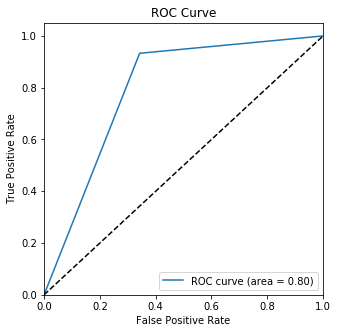

In [69]:
draw_roc(test_y , classes,)

## Resultados

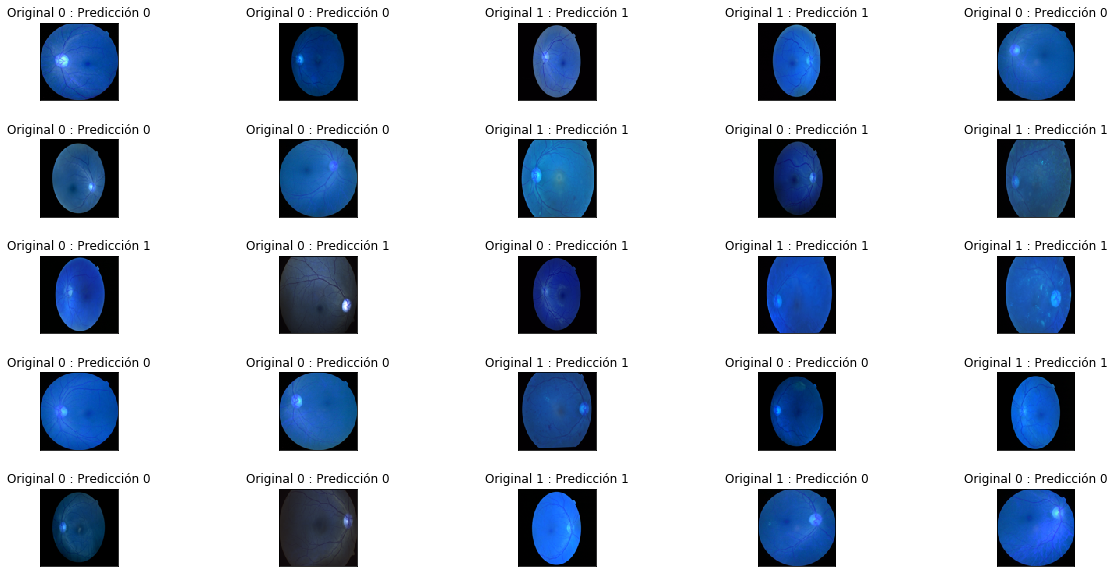

In [75]:
plt.figure(1 , figsize = (20 , 10))
n = 0 
for i in range(25):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(5 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)#0.5
    plt.imshow(test_x[r[0]])
    plt.title('Original {} : Predicción {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

# 0 = Ojo sano

# 1= Ojo Enfermo